# Median House Value Prediction in Boston

## I. Introduction

This project aims to bulid linear regression models to predict median house value($medv$) in Boston. The dataset is composed by 506 neighborhoods around Boston, including $medv$ and 13 predictors such as $rm$ (average number of rooms per house), $age$ (average age of houses), and $lstat$ (percent of households with low socioeconomic status).

This data frame contains the following columns:

- $crim$: per capita crime rate by town.

- $zn$: proportion of residential land zoned for lots over 25,000 sq.ft.

- $indus$: proportion of non-retail business acres per town.

- $chas$: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- $nox$: nitrogen oxides concentration (parts per 10 million).

- $rm$: average number of rooms per dwelling.

- $age$: proportion of owner-occupied units built prior to 1940.

- $dis$: weighted mean of distances to five Boston employment centres.

- $rad$: index of accessibility to radial highways.

- $tax$: full-value property-tax rate per $10,000.

- $ptratio$: pupil-teacher ratio by town.

- $black$: $1000(B_{k}-0.63)^2$ where $B_{k}$ is the proportion of blacks by town.

- $lstat$: lower status of the population (percent).

- $medv$: median value of owner-occupied homes in $1000s.

## II. Data Preparation

In [1]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# Load data
df = pd.read_csv('Boston.csv', index_col=None)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## III. Data Modeling

### 3.1 Simple Linear Regression

Let's start with simple linear regression. The $lstat$ (percent of households with low socioeconomic status) measures the ratio of poverty residents in that district. It can be presumed that the $lstat$ higher, the $medv$ lower.

In [5]:
# Fit a linear regression model
lm = smf.ols('medv ~ lstat', df)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           5.08e-88
Time:                        22:59:26   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to upon result, the estimated coefficient of $lstat$ is -0.95 in which p-value is almost 0. So that as $lstat$ increase 1 point, the $medv$ would decrease 0.95 million. The equation can be written as:

$ \hat{medv} = 34.55 - 0.95 * lstat$

Then we can predict $medv$ for $lstat$ is 5, 10 or 15.

In [6]:
predict = result.get_prediction(exog=dict(lstat=[5, 10, 15]))
predict.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


Based on upon equation, the median house value in the district with percent of households with low socioeconomic status as 5%, 10% and 15% are 29.80 million dollars, 25.05 million dollars and 20.30 million dollars.

(0, 52.83831228488073)

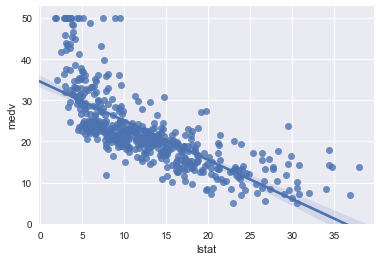

In [7]:
# Draw a plot
sns.regplot('lstat', 'medv', df)
plt.ylim(0,)

The plot shows that there is some non-linear patterns between $medv$ and $lstat$. It's obvious that the points spread as U-Shape. So let's explore this issue below.

(-5, 5)

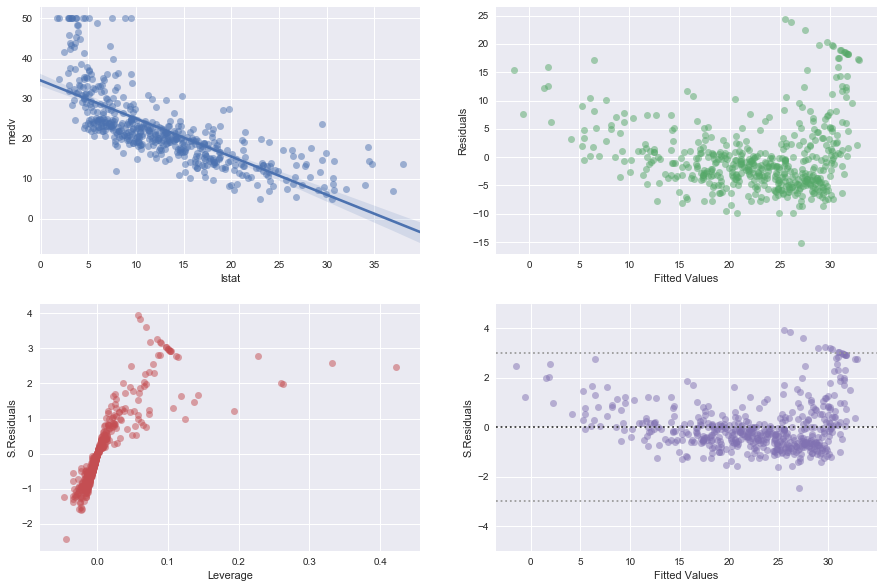

In [8]:
f, axes = plt.subplots(2, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)

sns.regplot('lstat', 'medv', df, ax=axes[0, 0], scatter_kws={'alpha': '0.5'})

# Draw the residual plot
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False, ax=axes[0, 1], scatter_kws={'alpha': '0.5'})

# Draw leverage-standardized residual plot
from statsmodels.stats.outliers_influence import OLSInfluence
s_residuals = pd.Series(result.resid_pearson, name="S.Residuals")
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals, fit_reg=False, ax=axes[1, 0], scatter_kws={'alpha': '0.5'})
#sm.graphics.plot_leverage_resid2(result, ax=axes[1, 0], color='red')

# Draw standardized residual plot
sns.regplot(fitted_values, s_residuals, ax=axes[1,1], fit_reg=False, scatter_kws={'alpha': '0.5'})
axes[1, 1].axhline(0, ls=":", c=".2")
axes[1, 1].axhline(-3, ls=":", c=".6")
axes[1, 1].axhline(3, ls=":", c=".6")
axes[1, 1].set_ylim(-5, 5)

The residual plots show that residuals are relevent with fitted values. The U-Shape indicates that there might be quadratic or cubic relationships between medv and lstat. Let's try some high order polynominals.

### 3.2 Polynominal Regression

Firstly, try to perform a regression of $medv$ onto $lstat$ and $lstat^2$

In [9]:
lm2 = smf.ols('medv ~ lstat + np.square(lstat)', df)
lm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 07 Jan 2020   Prob (F-statistic):          1.56e-112
Time:                        22:59:28   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
lstat               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(lstat)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. Then use anova to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [10]:
lm1 = smf.ols('medv ~ lstat', df).fit()
lm2 = smf.ols('medv ~ lstat + np.square(lstat)', df).fit()
sm.stats.anova_lm(lm1, lm2)

C:\Users\csu05\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\csu05\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\csu05\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here $lm1$ represents the linear submodel containing only one predictor, $lstat$, while $lm2$ corresponds to the larger quadratic model that has two predictors, $lstat$ and $lstat^2$. The F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors $lstat$ and lstat2 is far superior to the model that only contains the predictor $lstat$.

Now try higher order polynominal regressions unitil order=5.

In [11]:
smf.ols('medv ~ ' + '+'.join(['np.power(lstat,' + str(i) + ')' for i in range(1,6)]), df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Tue, 07 Jan 2020   Prob (F-statistic):          8.73e-122
Time:                        22:59:28   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit!

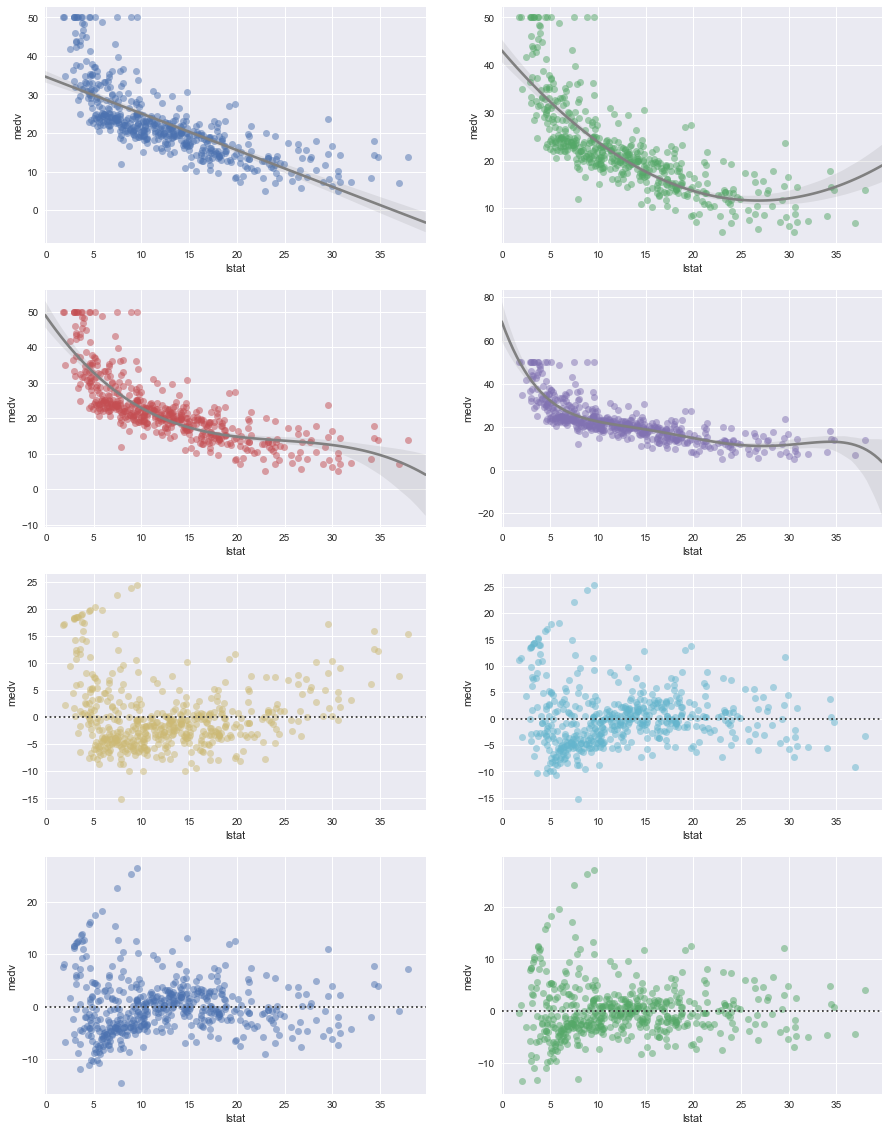

In [12]:
f, axes = plt.subplots(4, 2, sharex=False, sharey=False)
f.set_figheight(20)
f.set_figwidth(15)

sns.regplot('lstat', 'medv', df, ax=axes[0, 0], order=1, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.regplot('lstat', 'medv', df, ax=axes[0, 1], order=2, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.regplot('lstat', 'medv', df, ax=axes[1, 0], order=3, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.regplot('lstat', 'medv', df, ax=axes[1, 1], order=5, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.residplot('lstat', 'medv', df, ax=axes[2, 0], order=1, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.residplot('lstat', 'medv', df, ax=axes[2, 1], order=2, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.residplot('lstat', 'medv', df, ax=axes[3, 0], order=3, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.residplot('lstat', 'medv', df, ax=axes[3, 1], order=5, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})

### 3.3 Multiple Linear Regression

As for multiple linear regression, we can try $medv ~ lstat + age$ first.

In [13]:
mlm = smf.ols('medv ~ lstat + age', df)
result = mlm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           2.98e-88
Time:                        22:59:30   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both $lstat$ and $age$ are significant. But the p-value of $age$ is 5% which is slightly large. The fit the model with all 13 predictors:

In [14]:
mlm = smf.ols('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
result = mlm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        22:59:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
age            0.0007      0.013      0.052      0.958      -0.025       0.027
black          0.0093      0.003      3.467      0.001       0.004       0.015
chas           2.6867      0.862      3.118      0.002       0.994       4.380
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
rad            0.3060      0.066      4.613      0.000       0.176       0.436
rm             3.8099      0.418      9.116      0.000       2.989       4.631
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

That shows $age$ and $indus$ are not significant clearly. What if exclude them?

In [15]:
mlm = smf.ols('medv ~ ' + '+'.join(df.columns.difference(['medv', 'age', 'indus'])), df)
result = mlm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 07 Jan 2020   Prob (F-statistic):          5.54e-137
Time:                        22:59:31   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
black          0.0093      0.003      3.475      0.001       0.004       0.015
chas           2.7187      0.854      3.183      0.002       1.040       4.397
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
rad            0.2996      0.063      4.726      0.000       0.175       0.424
rm             3.8016      0.406      9.356      0.000       3.003       4.600
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
zn             0.0458      0.014      3.390      0.001       0.019       0.072
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model works well and all 11 predictors are significant. As for the equation:
$$\hat{medv} = 36.34 + 0.01*black + 2.72*chas - 0.11*crim - 1.49*dis - 0.52*lstat - 17.38*nox - 0.95*ptratic + 0.29*rad + 3.80*rm - 0.01*tax + 0.05*zn$$

In [16]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# don't forget to add constant if the ols model includes intercept
boston_exog = sm.add_constant(df.drop('medv', axis=1))
[vif(boston_exog.values, i) for i in range(boston_exog.shape[1])]

C:\Users\csu05\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[585.2652379423121,
 1.792191547433241,
 2.2987581787494418,
 3.9915964183460315,
 1.0739953275537883,
 4.393719847577493,
 1.9337444357832565,
 3.1008255128153364,
 3.9559449063727263,
 7.484496335274472,
 9.00855394759707,
 1.7990840492488978,
 1.348521076406375,
 2.9414910780919366]

### 3.4 Interaction Term

At the same time, there can be interaction effect within predictors. For example, the syntax $lstat*age$ simultaneously includes $lstat$, $age$, and the interaction term $lstat*age$ as predictors

In [17]:
smf.ols('medv ~ lstat*age', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           4.86e-88
Time:                        22:59:31   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Obviously the interaction term takes effect. Then the equation will be:
$$\hat{medv}=36.09-1.39*lstat-0.0007*age+0.0042*lstat*age$$